[ 0.19203572  0.09574055  0.07949438  0.14067856 -0.1984556   0.03995232
 -0.02268148  0.34856447  0.12431361  0.32604243]
tanhh values are:  [ 1.          1.          0.          0.         -1.          1.          1.
  0.25895892 -1.          1.          1.          1.          0.21656968
  1.          1.          0.21656968  1.         -1.          1.          1.
  1.          1.          0.30620224  0.52306689  0.49344215  0.49344215
  0.19484904  0.30620224  0.52306689  0.0954491   0.07292936  0.0954491   1.
  1.         -1.          0.37638707  1.          1.         -1.
  0.49344215  0.59235009  1.          1.          0.52306689  0.21656968
  0.21656968  1.          1.          0.12367716  1.          1.
  0.32095757  1.          0.42765876 -1.          1.         -1.          1.
 -1.          0.30620224 -1.         -1.          0.30620224  0.19484904
  1.          1.          0.21656968  0.21656968  0.21656968  1.         -1.
  0.07932735  0.0954491   1.          1.          0

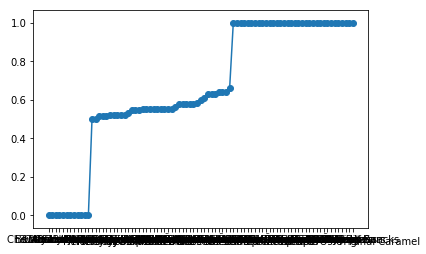

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x=pd.read_csv("candy-data.csv")
x=np.asmatrix(x)
x=np.array(x)
N,D=np.shape(x)
X=np.zeros((N,D-2))
X[:,0:10]=x[:,1:11]
Y=x[:,11]

for i in range (len(X[:,9])):
    if X[i,9]<0.45:
        X[i,10]=0
    elif 0.45<=X[i,9]<0.86 :
        X[i,10]=1
    elif X[i,9] >=0.86:
        X[i,10]=-2
X=np.array(X,dtype=float)
Y=np.array(Y,dtype=float)
X[:,10]=X[:,10]*100
w=np.linalg.solve(np.dot(X[:,0:10].T,X[:,0:10]),np.dot(X[:,0:10].T,Y))
X[:,[9,10]] = X[:,[10,9]]
Y1=np.dot(X[:,:10],w)
print(w)
def tanh(a):
    return (1-np.exp(-2*a))/(1+np.exp(-2*a))
def softmax(a):
    expa=np.exp(a)
    return expa/expa.sum()
def sigmod(a):
    return (1/(1+np.exp(-a)))
Ysi= sigmod(Y1)
Yso = softmax(Y1)
Ytn = tanh(Y1)
print ("tanhh values are: ",Ytn)
print ("softmax values are: ",Yso)
print ("Sigmoid values are: ",np.round(Ysi))
plt.scatter(np.sort(x[:,0].T),np.sort(Ysi.T))
plt.plot(np.sort(x[:,0].T),np.sort(Ysi.T))
plt.show()